In [3]:
import random
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import kendalltau
from ast import literal_eval
import timeit

Questions, Dataset and motivation section:

Motivation:

League of legends is a multiplayer online battle arena video game developed and published by Riot Games which is one of the most popular game in the earth right now.The professional league is very exciting to watch that the 2018 League of Legends World Finals had nearly 100 million viewers. In the opposite, those presenters make poor predictions or ambiguous judgements on leads which gave views misleading on game real-time analysis all-time. Our goal is to dig deep in game real-time data, not only on the gold difference on two team but based on all other datas to predict the result of game, give viewers direct and precise feedback on real-time professional league game. This project could be further developed to website or tool to do function like real-time game analysis which all major analysis webside does not provide.

Questions:
Should team focus choose late game comp or early game comp on champion select in general based on winrate analysis?

If had a chance, should the team choose to destroy object, eliminate neutral monster or kill enemy players?

If we want to enjoy an entire series of game(best-of-five-sets format), how long does it take usual? We have to find the game length distributions.

DataSet:
Data set come from kaggle. Total 8 dataset and main dataset with 7620 rows and 58 columns. Contains all game in side status on each minutes from professional league game between 2015-2018 in the world. 

Input and Output:
Input is the game data after we transformate for model use, Output would be series of analysis graph and the blue team result(win or lose).

In [4]:
matchinfo = pd.read_csv('leagueoflegends/LeagueofLegends.csv')
gold = pd.read_csv('leagueoflegends/gold.csv')
kills = pd.read_csv('leagueoflegends/kills.csv')
info = pd.read_csv('leagueoflegends/matchinfo.csv')
structures = pd.read_csv('leagueoflegends/structures.csv')
monsters = pd.read_csv('leagueoflegends/monsters.csv')
columns = pd.read_csv('leagueoflegends/_columns.csv')

Detailed main data column element introduction:

In [5]:
columns

,ColumnName,ColumnDescription
0,Address,website address the data is scraped from \n
1,League,League or Tournament the match took place in \n
2,Year,Year the match took place in \n
3,Season,Spring or Summer depending on which half of th...
4,Type,"Season, Playoffs, Regional, or International m..."
5,blueTeamTag,Blue Team's tag name (ex. Team SoloMid is TSM...
6,bResult,Result of the match for Blue Team - 1 is a wi...
7,rResult,Result of the match for Red Team - 1 is a win...
8,redTeamTag,Red Team's Tag Name (ex. Team SoloMid is TSM) \n
9,gamelength,Game length in minutes \n


In [8]:
matchinfo.head(5)

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


In [9]:
matchinfo.to_pickle("leagueoflegends/match.pkl")

Save main data to pickle.

In [10]:
df = pd.read_pickle("leagueoflegends/match.pkl")

In [11]:
df.shape

(7620, 57)

In [12]:
df.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


Main data datatypes:

In [13]:
df.dtypes

League              object
Year                 int64
Season              object
Type                object
blueTeamTag         object
bResult              int64
rResult              int64
redTeamTag          object
gamelength           int64
golddiff            object
goldblue            object
bKills              object
bTowers             object
bInhibs             object
bDragons            object
bBarons             object
bHeralds            object
goldred             object
rKills              object
rTowers             object
rInhibs             object
rDragons            object
rBarons             object
rHeralds            object
blueTop             object
blueTopChamp        object
goldblueTop         object
blueJungle          object
blueJungleChamp     object
goldblueJungle      object
blueMiddle          object
blueMiddleChamp     object
goldblueMiddle      object
blueADC             object
blueADCChamp        object
goldblueADC         object
blueSupport         object
b

In [16]:
df.isnull().any()

League              False
Year                False
Season              False
Type                False
blueTeamTag          True
bResult             False
rResult             False
redTeamTag           True
gamelength          False
golddiff            False
goldblue            False
bKills              False
bTowers             False
bInhibs             False
bDragons            False
bBarons             False
bHeralds            False
goldred             False
rKills              False
rTowers             False
rInhibs             False
rDragons            False
rBarons             False
rHeralds            False
blueTop              True
blueTopChamp        False
goldblueTop         False
blueJungle           True
blueJungleChamp     False
goldblueJungle      False
blueMiddle           True
blueMiddleChamp     False
goldblueMiddle      False
blueADC              True
blueADCChamp        False
goldblueADC         False
blueSupport          True
blueSupportChamp    False
goldblueSupp

Quality of cleaning:
1.Data Cleaning and type conversion activity:

We noticed that few columns are certain list attribute for each team(column 10-24 in our data frame). we should change the dtype of them. Also, because these attributes are list of minutes, it should has the length which is less than the value of game length or exactly the value of gamelength, we should check if that is the thing.


2.Missed value:
on column like Blue/Red Top,mid,Bottom, Support,Jungle, which is the role of the game and it contains player name and Blue/Red team tag. We would ignore it first because it is not the data we looking for this project. Detailed data cleaning activity were introduced on each section of data transformation below on each section.

3.Data summary statistics and interpretation.
on the end of data section.


In [17]:
df[['gamelength', 'bKills']].head(4)

,gamelength,bKills
0,40,"[[10.82, 'C9 Hai', 'TSM Bjergsen', [], 9229, 8..."
1,38,"[[11.104, 'DIG Shiphtur', 'CST Jesiz', ['CST I..."
2,40,"[[5.255, 'GV Keane', 'WFX Pobelter', ['WFX Sho..."
3,41,"[[8.274, 'TL Quas', 'TIP Rhux', ['TIP Apollo']..."


In [20]:
len(df['golddiff'][0])

226

In [27]:
type(df['bKills'][0])

str

In [30]:
df['golddiff'] = df['golddiff'].apply(literal_eval)
df['goldblue'] = df['goldblue'].apply(literal_eval)
df['bKills'] = df['bKills'].apply(literal_eval)
df['bTowers'] = df['bTowers'].apply(literal_eval)
df['bInhibs'] = df['bInhibs'].apply(literal_eval)
df['bDragons'] = df['bDragons'].apply(literal_eval)
df['bBarons'] = df['bBarons'].apply(literal_eval)
df['bHeralds'] = df['bHeralds'].apply(literal_eval)
df['goldred'] = df['goldred'].apply(literal_eval)
df['rKills'] = df['rKills'].apply(literal_eval)
df['rTowers'] = df['rTowers'].apply(literal_eval)
df['rInhibs'] = df['rInhibs'].apply(literal_eval)
df['rDragons'] = df['rDragons'].apply(literal_eval)
df['rBarons'] = df['rBarons'].apply(literal_eval)
df['rHeralds'] = df['rHeralds'].apply(literal_eval)
df['goldblueTop'] = df['goldblueTop'].apply(literal_eval)
df['goldblueJungle'] = df['goldblueJungle'].apply(literal_eval)
df['goldblueMiddle'] = df['goldblueMiddle'].apply(literal_eval)
df['goldblueADC'] = df['goldblueADC'].apply(literal_eval)
df['goldblueSupport'] = df['goldblueSupport'].apply(literal_eval)
df['goldredTop'] = df['goldredTop'].apply(literal_eval)
df['goldredJungle'] = df['goldredJungle'].apply(literal_eval)
df['goldredMiddle'] = df['goldredMiddle'].apply(literal_eval)
df['goldredADC'] = df['goldredADC'].apply(literal_eval)
df['goldredSupport'] = df['goldredSupport'].apply(literal_eval)

Seems like gold diff is str. It should be the same situation other column data has, apply literal_eval function on those columns to fix it.

In [31]:
len(df['golddiff'][0])

40

In [32]:
len(df['bKills'][0])

16

In [33]:
type(df['bKills'][0])

list

In [34]:
df.dtypes

League              object
Year                 int64
Season              object
Type                object
blueTeamTag         object
bResult              int64
rResult              int64
redTeamTag          object
gamelength           int64
golddiff            object
goldblue            object
bKills              object
bTowers             object
bInhibs             object
bDragons            object
bBarons             object
bHeralds            object
goldred             object
rKills              object
rTowers             object
rInhibs             object
rDragons            object
rBarons             object
rHeralds            object
blueTop             object
blueTopChamp        object
goldblueTop         object
blueJungle          object
blueJungleChamp     object
goldblueJungle      object
blueMiddle          object
blueMiddleChamp     object
goldblueMiddle      object
blueADC             object
blueADCChamp        object
goldblueADC         object
blueSupport         object
b

Game length distribution analysis below:

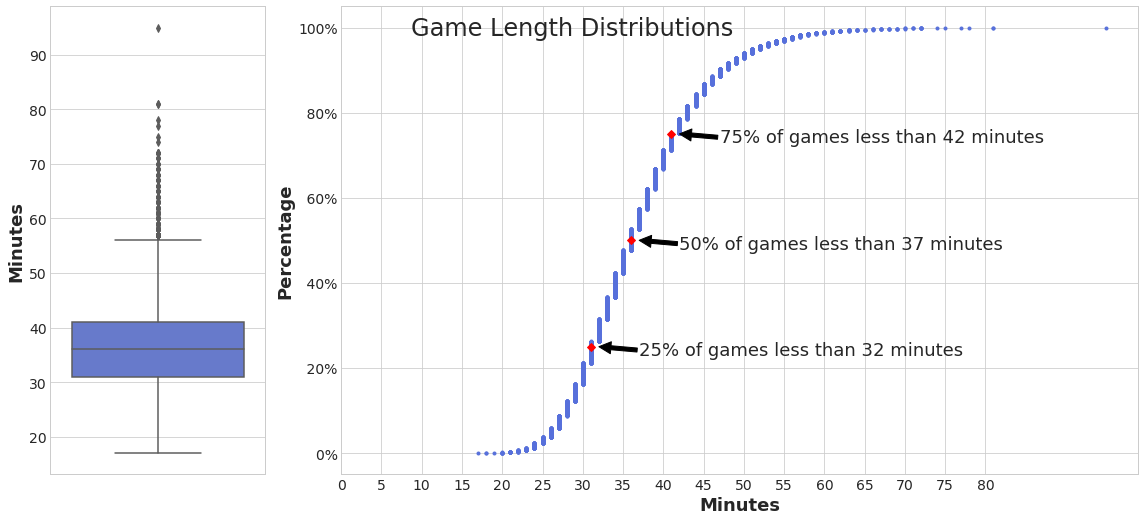

In [35]:
sns.set_style('whitegrid')
colors = sns.color_palette('hls', 8)

fig, ax = plt.subplots(1,2, figsize=(16,14))
fig.suptitle('Game Length Distributions', fontsize=24)
fig.subplots_adjust(top=0.9)
percentiles = np.array([25, 50, 75])
ptiles_gl = np.percentile(df['gamelength'], percentiles)
p1 = plt.subplot2grid((2,4), (0,0), colspan=1)
sns.boxplot(y=df['gamelength'], color=colors[5])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Minutes', fontsize = 18, fontweight = 'bold')


p2 = plt.subplot2grid((2,4), (0,1), colspan=3)
x = np.sort(df['gamelength'])
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x,y, marker='.', linestyle='none', color=colors[5])
plt.plot(ptiles_gl, percentiles/100, marker='D', color='red', linestyle='none')
yvals = p2.get_yticks()
p2.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(np.arange(0, 85, 5), fontsize=14)
plt.xlabel('Minutes', fontsize=18, fontweight = 'bold')
plt.ylabel('Percentage', fontsize=18, fontweight='bold')
plt.annotate('25% of games less than 32 minutes', xy=(32, .25), xytext=(37, .23), fontsize=18, 
             arrowprops=dict(facecolor='black'))
plt.annotate('50% of games less than 37 minutes', xy=(37, .5), xytext=(42, .48), 
             fontsize=18, arrowprops=dict(facecolor='black'))
plt.annotate('75% of games less than 42 minutes', xy=(42, .75), xytext=(47, .73), fontsize=18, 
             arrowprops=dict(facecolor='black'))


plt.tight_layout()
plt.show()

We find that about 50% game ends between 32 and 42 minuteswhich we has very less game ending early than 20 minutes or late than 60 minutes, we would use those facts for our future data analysis. It help us to figure out the data distribution too because all data were based on minutes ie. game time.

In [37]:
df['golddiff']

0       [0, 0, -14, -65, -268, -431, -488, -789, -494,...
1       [0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...
2       [0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...
3       [0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...
4       [40, 40, 44, -36, 113, 158, -121, -191, 23, 20...
5       [0, 0, 20, -42, -48, -24, -219, -272, -319, -5...
6       [0, 13, -7, 6, -353, -215, -795, -764, 369, 35...
7       [0, 0, 26, 91, -109, 264, 178, 66, -65, 206, 5...
8       [0, -10, 0, 162, -269, -63, 323, 225, 274, 624...
9       [0, 0, 0, 68, 498, 210, 283, 311, 133, 291, 32...
10      [0, -10, -15, -274, -154, -49, 134, 122, 391, ...
11      [0, 0, 15, -91, -163, -45, -51, -192, -211, -3...
12      [40, 40, 56, 30, 14, 30, 249, -126, -110, -233...
13      [0, 0, 6, -532, -286, -533, -556, -1535, -1925...
14      [0, 0, 0, 708, 460, 753, 874, 907, 965, 891, 1...
15      [0, 0, 0, 101, 286, 129, -59, 1184, 895, 1028,...
16      [0, 10, -7, 78, 7, -146, 206, 75, -136, 15, 74...
17      [0, 0,

Gold difference vs winrate analysis:

we made a new data frame which stores only minute(real-time game length), Gold lead(Blue team) and the winrate based on the gold lead and the the game length on that time. Gold lead was calculated from the gold diff column , we made it from -10000 to 10000 with interval 500. Minute from 0 to 60 minutes with interval 5 to generate a heatmap on real-time gold difference and win-rate. Also three graph on early game(Minute <20),middle game(<20minute<40) and late game (40<minute<60)

In [39]:
dy = 500
dx = 5
df2= []
for index, row in df.iterrows():
    gdiff= [10000 if a > 10000 else -10000 if a < -10000 else int(int(a/dy)*dy) for a in row.golddiff]
    m= min(60+1,len(gdiff))        
    if row.bResult==1:
        for g in range(1, m): df2.append([int(int((g-1)/dx)*dx+dx), gdiff[g], 1])
        for g in range(1, m): df2.append([int(int((g-1)/dx)*dx+dx), -gdiff[g], 0])      
    elif row.rResult==1: 
        for g in range(1, m): df2.append([int(int((g-1)/dx)*dx+dx), -gdiff[g], 1])
        for g in range(1, m): df2.append([int(int((g-1)/dx)*dx+dx), gdiff[g], 0])
    else: print('Bad result'); continue  
df2= pd.DataFrame(df2); df2.columns= ['Time (min)', 'Gold Lead', 'Win Percent']

numgames= [int(x/10) for x in df2.groupby(['Time (min)']).size().reset_index(name='counts')['counts']]
df2= df2.groupby(['Time (min)', 'Gold Lead']).apply(lambda x: x['Win Percent'].sum()/len(x)).reset_index(name='Win Percent')
df2['Win Percent']= df2['Win Percent'].map(lambda x: int(x*100))
df3 = df2
df2= df2.pivot('Gold Lead', 'Time (min)', 'Win Percent') # GRAPH HEAT MAP
yticknames=['' if (k/500)%2==1 else str(int(k/1000.0))+'k' for k in range(-10000,10000+1,int(dy))]


In [41]:
df3

,Time (min),Gold Lead,Win Percent
0,5,-3000,0
1,5,-2500,0
2,5,-2000,3
3,5,-1500,12
4,5,-1000,23
5,5,-500,31
6,5,0,50
7,5,500,68
8,5,1000,76
9,5,1500,87


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


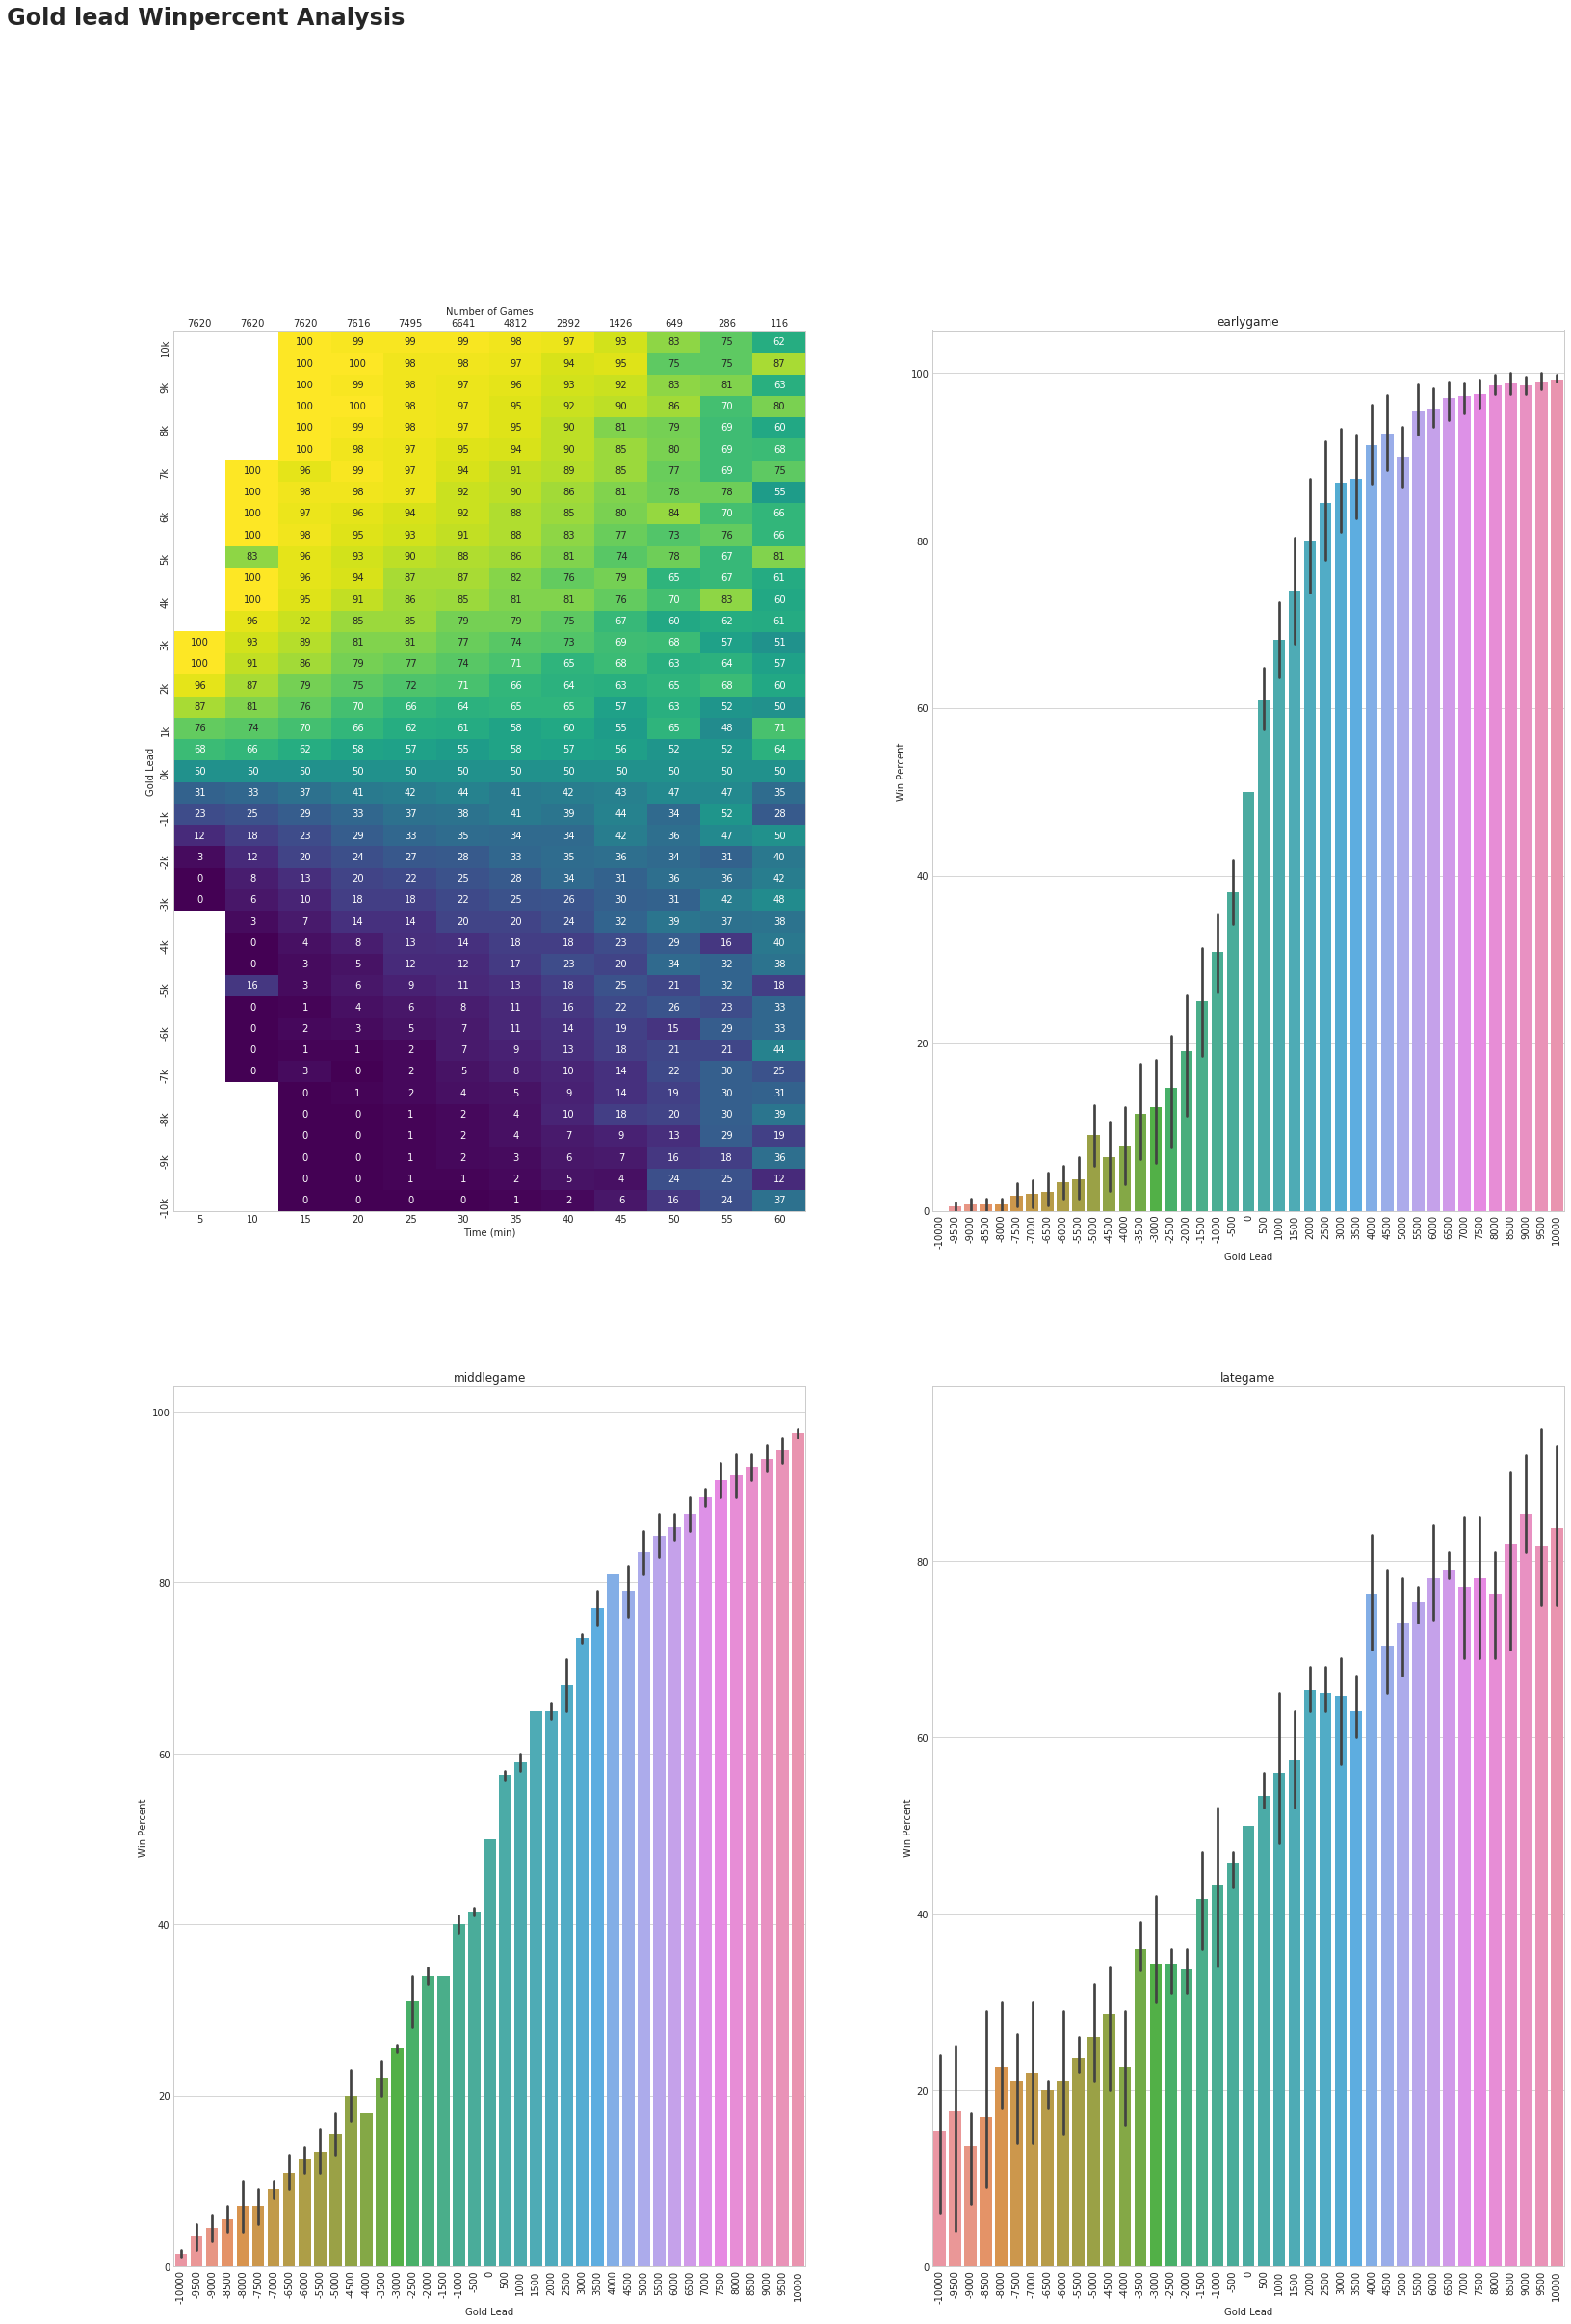

In [42]:
fig, ax = plt.subplots(2,2, figsize=(40,36))
fig.suptitle('Gold lead Winpercent Analysis', x=0.065, y=1.03, fontsize=24, fontweight='bold', 
             horizontalalignment='left')
fig.subplots_adjust(top=0.9)

percentiles = np.array([25, 50, 75])
ptiles_gl = np.percentile(df['gamelength'], percentiles)

plots = plt.subplot2grid((2,3), (0,0), colspan=1)
sns.heatmap(df2, vmin=0, vmax=100, yticklabels=yticknames, ax=plots, annot=True, cbar=False, fmt='g', cmap='viridis').invert_yaxis()
ax2= plots.twiny()
ax2.set_xlim(plots.get_xlim())
ax2.set_xticks([x+0.5 for x in range(int(dx/2),60,int(dx))]+[60])
ax2.set_xticklabels([int(x) for x in numgames])
ax2.set_xlabel(r'Number of Games')
ax2.grid(False)

plot2= plt.subplot2grid((2,3), (0,1), colspan=1)
plt.title('earlygame')
sns.barplot(x = df3['Gold Lead'][df3['Time (min)'].between(0, 32, inclusive=False)], y= df3['Win Percent'][df3['Time (min)'].between(0, 32, inclusive=False)])
plt.xticks(rotation='vertical',fontsize=10)
plot3= plt.subplot2grid((2,3), (1,0), colspan=1)
plt.title('middlegame')
sns.barplot(x = df3['Gold Lead'][df3['Time (min)'].between(32, 42, inclusive=False)], y= df3['Win Percent'][df3['Time (min)'].between(32, 42, inclusive=False)])
plt.xticks(rotation='vertical',fontsize=10)
plot4= plt.subplot2grid((2,3), (1,1), colspan=1)
plt.title('lategame')
sns.barplot(x = df3['Gold Lead'][df3['Time (min)'].between(42, 60, inclusive=False)], y= df3['Win Percent'][df3['Time (min)'].between(42, 60, inclusive=False)])
plt.xticks(rotation='vertical',fontsize=10)
plt.show()

We choose only data from 0 to 60 minutes because we find that very few games end after 60 minutes by game length analysis above.
Observation on gold diff on time vs winrate:
1.Gold is the direct attribute to reflect Leads
2.Importance of gold lead(gold diff) between two game become less as game length increase, but doesn’t fall off much.
3.Team with big gold lead in early period tends to win game straightly.

Conclusion: Early game > Late game

In [43]:
df.to_pickle("leagueoflegends/modified.pkl")

In [44]:
model = pd.read_pickle("leagueoflegends/modified.pkl")

In [45]:
matchinfo = pd.read_csv('leagueoflegends/LeagueofLegends.csv')
gold = pd.read_csv('leagueoflegends/gold.csv')
kills = pd.read_csv('leagueoflegends/kills.csv')
info = pd.read_csv('leagueoflegends/matchinfo.csv')
structures = pd.read_csv('leagueoflegends/structures.csv')
monsters = pd.read_csv('leagueoflegends/monsters.csv')
columns = pd.read_csv('leagueoflegends/_columns.csv')

We now using in-game data beside gold diffence and see how our model works on those data only. Instead of main dataset we would use more detailed data from other dataset and using address as our key for data reduction and transformation. We add a new column id which based on address column which is the website we could find the match data to match data on each game.

In [46]:
model['id'] = model['Address'].astype(str).str[-16:]
kills['id'] = kills['Address'].astype(str).str[-16:]
monsters['id'] = monsters['Address'].astype(str).str[-16:]
structures['id'] = structures['Address'].astype(str).str[-16:]
model.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address,id
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...,fbb300951ad8327c
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...,055b17da8456fdc8
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...,8e8a9b58df366e2d
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...,0ed1cd0e0e57329c
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...,f932becf86175f38


In [47]:
monsters['Type'].unique()

array(['DRAGON', 'EARTH_DRAGON', 'WATER_DRAGON', 'AIR_DRAGON',
       'FIRE_DRAGON', 'ELDER_DRAGON', 'BARON_NASHOR', 'RIFT_HERALD'],
      dtype=object)

Dragon was updated to Water ,Wind , Earth and Fire dragon after patch 6.9(2016 preseason), There is 5 column count for dragon now while one is expire. Have to clean those from our dataset.

In [48]:
old_dragon_id = monsters[ monsters['Type']=="DRAGON"]['id'].unique()
old_dragon_id

array(['fbb300951ad8327c', '055b17da8456fdc8', '8e8a9b58df366e2d', ...,
       'd2eaf13bcbb3c021', '035394afd3bfc218', '94537494cdbc8b4c'],
      dtype=object)

In [49]:
monsters = monsters[ ~monsters['id'].isin(old_dragon_id)]
monsters[monsters['Type']=="DRAGON"]

,Address,Team,Time,Type,id


Same with kill.

In [50]:
kills = kills[ ~kills['id'].isin(old_dragon_id)]
kills = kills[ kills['Time']>0]

kills['Minute'] = kills['Time'].astype(int)

kills['Team'] = np.where( kills['Team']=="rKills","Red","Blue")
kills.head()

,Address,Team,Time,Victim,Killer,Assist_1,Assist_2,Assist_3,Assist_4,x_pos,y_pos,id,Minute
4462,http://matchhistory.na.leagueoflegends.com/en/...,Blue,6.032,CLG Huhi,TSM Svenskeren,TSM Bjergsen,NaN,NaN,NaN,7825,8666,55109b5a7a91ae87,6
4463,http://matchhistory.na.leagueoflegends.com/en/...,Blue,9.428,CLG Huhi,TSM Biofrost,TSM Bjergsen,TSM Doublelift,NaN,NaN,8728,8751,55109b5a7a91ae87,9
4464,http://matchhistory.na.leagueoflegends.com/en/...,Blue,9.780,CLG Xmithie,TSM Bjergsen,TSM Hauntzer,TSM Svenskeren,NaN,NaN,8655,1172,55109b5a7a91ae87,9
4465,http://matchhistory.na.leagueoflegends.com/en/...,Blue,10.252,CLG Stixxay,TSM Doublelift,TSM Biofrost,NaN,NaN,NaN,3621,11607,55109b5a7a91ae87,10
4466,http://matchhistory.na.leagueoflegends.com/en/...,Blue,12.993,CLG Darshan,TSM Doublelift,TSM Biofrost,NaN,NaN,NaN,5674,12903,55109b5a7a91ae87,12


In [51]:
f = {'Time':['mean','count']}

killsGrouped = kills.groupby( ['id','Team','Minute'] ).agg(f).reset_index()
killsGrouped.columns = ['id','Team','Minute','Time Avg','Count']
killsGrouped = killsGrouped.sort_values(by=['id','Minute'])
killsGrouped.head(13)

,id,Team,Minute,Time Avg,Count
4,0001f4374a03c133,Red,4,4.6350,1
5,0001f4374a03c133,Red,6,6.0640,1
0,0001f4374a03c133,Blue,8,8.1940,1
6,0001f4374a03c133,Red,10,10.4780,1
7,0001f4374a03c133,Red,17,17.3870,2
1,0001f4374a03c133,Blue,18,18.0980,1
8,0001f4374a03c133,Red,18,18.0670,2
9,0001f4374a03c133,Red,21,21.7900,1
2,0001f4374a03c133,Blue,22,22.5125,2
10,0001f4374a03c133,Red,22,22.4578,5


choose only the data we need for future use.

Change datatype in structure and modify team column as the type we have in previous dataframe.

In [52]:
structures = structures[ ~structures['id'].isin(old_dragon_id)]
structures = structures[ structures['Time']>0]

structures['Minute'] = structures['Time'].astype(int)
structures['Team'] = np.where(structures['Team']=="bTowers","Blue",
                        np.where(structures['Team']=="binhibs","Blue","Red"))
structures2 = structures.sort_values(by=['id','Minute'])
structures2.head(13)

,Address,Team,Time,Lane,Type,id,Minute
6740,http://matchhistory.na.leagueoflegends.com/en/...,Blue,11.182,TOP_LANE,OUTER_TURRET,0001f4374a03c133,11
57600,http://matchhistory.na.leagueoflegends.com/en/...,Red,11.006,BOT_LANE,OUTER_TURRET,0001f4374a03c133,11
6741,http://matchhistory.na.leagueoflegends.com/en/...,Blue,16.556,BOT_LANE,OUTER_TURRET,0001f4374a03c133,16
57601,http://matchhistory.na.leagueoflegends.com/en/...,Red,16.145,TOP_LANE,OUTER_TURRET,0001f4374a03c133,16
57598,http://matchhistory.na.leagueoflegends.com/en/...,Red,18.378,MID_LANE,OUTER_TURRET,0001f4374a03c133,18
57602,http://matchhistory.na.leagueoflegends.com/en/...,Red,24.943,MID_LANE,INNER_TURRET,0001f4374a03c133,24
57599,http://matchhistory.na.leagueoflegends.com/en/...,Red,25.463,TOP_LANE,INNER_TURRET,0001f4374a03c133,25
57597,http://matchhistory.na.leagueoflegends.com/en/...,Red,26.330,BOT_LANE,INNER_TURRET,0001f4374a03c133,26
57594,http://matchhistory.na.leagueoflegends.com/en/...,Red,33.153,MID_LANE,BASE_TURRET,0001f4374a03c133,33
57595,http://matchhistory.na.leagueoflegends.com/en/...,Red,33.326,MID_LANE,NEXUS_TURRET,0001f4374a03c133,33


In [53]:
kills_structures = killsGrouped.merge(structures2[['id','Minute','Team','Time','Lane','Type']],
                                      on=['id','Minute','Team'],how='outer')
kills_structures.head(20)

,id,Team,Minute,Time Avg,Count,Time,Lane,Type
0,0001f4374a03c133,Red,4,4.6350,1.0,NaN,NaN,NaN
1,0001f4374a03c133,Red,6,6.0640,1.0,NaN,NaN,NaN
2,0001f4374a03c133,Blue,8,8.1940,1.0,NaN,NaN,NaN
3,0001f4374a03c133,Red,10,10.4780,1.0,NaN,NaN,NaN
4,0001f4374a03c133,Red,17,17.3870,2.0,NaN,NaN,NaN
5,0001f4374a03c133,Blue,18,18.0980,1.0,NaN,NaN,NaN
6,0001f4374a03c133,Red,18,18.0670,2.0,18.378,MID_LANE,OUTER_TURRET
7,0001f4374a03c133,Red,21,21.7900,1.0,NaN,NaN,NaN
8,0001f4374a03c133,Blue,22,22.5125,2.0,NaN,NaN,NaN
9,0001f4374a03c133,Red,22,22.4578,5.0,NaN,NaN,NaN


merge kill and structure dataframe,we would do data cleaning latter.

In [55]:
monsters = monsters[ ~monsters['id'].isin(old_dragon_id)]
monsters['Type2'] = np.where( monsters['Type']=="FIRE_DRAGON", "DRAGON",
                    np.where( monsters['Type']=="EARTH_DRAGON","DRAGON",
                    np.where( monsters['Type']=="WATER_DRAGON","DRAGON",       
                    np.where( monsters['Type']=="AIR_DRAGON","DRAGON",   
                             monsters['Type']))))

monsters = monsters[ monsters['Time']>0]

monsters['Minute'] = monsters['Time'].astype(int)

monsters['Team'] = np.where( monsters['Team']=="bDragons","Blue",
                   np.where( monsters['Team']=="bHeralds","Blue",
                   np.where( monsters['Team']=="bBarons", "Blue", 
                           "Red")))



monsters.head()

,Address,Team,Time,Type,id,Type2,Minute
696,http://matchhistory.na.leagueoflegends.com/en/...,Red,23.444,EARTH_DRAGON,55109b5a7a91ae87,DRAGON,23
697,http://matchhistory.na.leagueoflegends.com/en/...,Red,31.069,WATER_DRAGON,55109b5a7a91ae87,DRAGON,31
698,http://matchhistory.na.leagueoflegends.com/en/...,Red,16.419,AIR_DRAGON,55109b5a7a91ae87,DRAGON,16
699,http://matchhistory.na.leagueoflegends.com/en/...,Red,32.022,EARTH_DRAGON,e147296c928da5b4,DRAGON,32
700,http://matchhistory.na.leagueoflegends.com/en/...,Red,25.304,WATER_DRAGON,e147296c928da5b4,DRAGON,25


In [56]:
kills_structures_monsters = kills_structures.merge(monsters[['id','Minute','Team','Time','Type2']], on=['id','Minute'],how='outer')
kills_structures_monsters = kills_structures_monsters.sort_values(by=['id','Minute'])
kills_structures_monsters.head(5)

,id,Team_x,Minute,Time Avg,Count,Time_x,Lane,Type,Team_y,Time_y,Type2
0,0001f4374a03c133,Red,4,4.635,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0001f4374a03c133,Red,6,6.064,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0001f4374a03c133,Blue,8,8.194,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0001f4374a03c133,Red,10,10.478,1.0,NaN,NaN,NaN,NaN,NaN,NaN
94502,0001f4374a03c133,Blue,11,NaN,NaN,11.182,TOP_LANE,OUTER_TURRET,Red,11.261,DRAGON


merge all dataframe into one.

In [57]:

stackedData = killsGrouped.append(structures2)
stackedData = stackedData.append(monsters[['id','Address','Team','Minute','Time','Type2']])

stackedData['Time2'] = stackedData['Time'].fillna(stackedData['Time Avg'])

stackedData = stackedData.sort_values(by=['id','Time2'])

stackedData['EventNum'] = stackedData.groupby('id').cumcount()+1

stackedData = stackedData[['id','EventNum','Team','Minute','Time2','Count','Type','Lane','Type2']]

stackedData.columns = ['id','EventNum','Team','Minute','Time','KillCount','StructType','StructLane','Monster']

stackedData.head(5)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,id,EventNum,Team,Minute,Time,KillCount,StructType,StructLane,Monster
4,0001f4374a03c133,1,Red,4,4.635,1.0,NaN,NaN,NaN
5,0001f4374a03c133,2,Red,6,6.064,1.0,NaN,NaN,NaN
0,0001f4374a03c133,3,Blue,8,8.194,1.0,NaN,NaN,NaN
6,0001f4374a03c133,4,Red,10,10.478,1.0,NaN,NaN,NaN
57600,0001f4374a03c133,5,Red,11,11.006,NaN,OUTER_TURRET,BOT_LANE,NaN


In [58]:
stackedData['Event'] = np.where(stackedData['KillCount']>0,"KILLS",None)
stackedData['Event'] = stackedData['Event'].fillna(stackedData['StructType'])
stackedData['Event'] = stackedData['Event'].fillna(stackedData['Monster'])

                        

stackedData.head(10)

,id,EventNum,Team,Minute,Time,KillCount,StructType,StructLane,Monster,Event
4,0001f4374a03c133,1,Red,4,4.635,1.0,NaN,NaN,NaN,KILLS
5,0001f4374a03c133,2,Red,6,6.064,1.0,NaN,NaN,NaN,KILLS
0,0001f4374a03c133,3,Blue,8,8.194,1.0,NaN,NaN,NaN,KILLS
6,0001f4374a03c133,4,Red,10,10.478,1.0,NaN,NaN,NaN,KILLS
57600,0001f4374a03c133,5,Red,11,11.006,NaN,OUTER_TURRET,BOT_LANE,NaN,OUTER_TURRET
6740,0001f4374a03c133,6,Blue,11,11.182,NaN,OUTER_TURRET,TOP_LANE,NaN,OUTER_TURRET
24027,0001f4374a03c133,7,Red,11,11.261,NaN,NaN,NaN,DRAGON,DRAGON
42565,0001f4374a03c133,8,Red,15,15.777,NaN,NaN,NaN,RIFT_HERALD,RIFT_HERALD
57601,0001f4374a03c133,9,Red,16,16.145,NaN,OUTER_TURRET,TOP_LANE,NaN,OUTER_TURRET
6741,0001f4374a03c133,10,Blue,16,16.556,NaN,OUTER_TURRET,BOT_LANE,NaN,OUTER_TURRET


By transformation We now have dataframe contains type of structure, monter and event classification on event column and count event number on Eventnum column. We now have to change them to int format for our model train by using cumcount on each group with same team and same time column which contains the string in same type of events.

In [231]:
stackedData.to_pickle("leagueoflegends/stacked.pkl")

In [232]:
stackedDatas = pd.read_pickle("leagueoflegends/stacked.pkl")

In [233]:
stackedDatas = stackedData.sort_values(by=['id','Minute'])

In [234]:
stackedDatas = stackedDatas.set_index(np.arange(len(stackedDatas.index)))

In [237]:
stackedDatas['Blue_Kill_count'] = stackedDatas[(stackedDatas['Event'].str.contains('KILL'))&(stackedDatas['Team'].str.contains('Blue'))].groupby(['Team','id']).cumcount()+1
stackedDatas['Blue_Object_count'] = stackedDatas[(stackedDatas['Event'].str.contains('TURRET'))&(stackedDatas['Team'].str.contains('Blue'))].groupby(['Team','id']).cumcount()+1
stackedDatas['Blue_Monster_count'] = stackedDatas[(stackedDatas['Event'].str.contains('DRAGON|HERALD|BARON'))&(stackedDatas['Team'].str.contains('Blue'))].groupby(['Team','id']).cumcount()+1
stackedDatas['Red_Kill_count'] = stackedDatas[(stackedDatas['Event'].str.contains('KILL'))&(stackedDatas['Team'].str.contains('Red'))].groupby(['Team','id']).cumcount()+1
stackedDatas['Red_Object_count'] = stackedDatas[(stackedDatas['Event'].str.contains('TURRET'))&(stackedDatas['Team'].str.contains('Red'))].groupby(['Team','id']).cumcount()+1
stackedDatas['Red_Monster_count'] = stackedDatas[(stackedDatas['Event'].str.contains('DRAGON|HERALD|BARON'))&(stackedDatas['Team'].str.contains('Red'))].groupby(['Team','id']).cumcount()+1

In [241]:
stackedDatas

,id,EventNum,Team,Minute,Time,KillCount,StructType,StructLane,Monster,Event,Blue_Kill_count,Blue_Object_count,Red_Monster_count,Red_Kill_count,Red_Object_count,Blue_Monster_count
0,0001f4374a03c133,1,Red,4,4.635000,1.0,NaN,NaN,NaN,KILLS,NaN,NaN,NaN,1.0,NaN,NaN
1,0001f4374a03c133,2,Red,6,6.064000,1.0,NaN,NaN,NaN,KILLS,NaN,NaN,NaN,2.0,NaN,NaN
2,0001f4374a03c133,3,Blue,8,8.194000,1.0,NaN,NaN,NaN,KILLS,1.0,NaN,NaN,NaN,NaN,NaN
3,0001f4374a03c133,4,Red,10,10.478000,1.0,NaN,NaN,NaN,KILLS,NaN,NaN,NaN,3.0,NaN,NaN
4,0001f4374a03c133,5,Red,11,11.006000,NaN,OUTER_TURRET,BOT_LANE,NaN,OUTER_TURRET,NaN,NaN,NaN,NaN,1.0,NaN
5,0001f4374a03c133,6,Blue,11,11.182000,NaN,OUTER_TURRET,TOP_LANE,NaN,OUTER_TURRET,NaN,1.0,NaN,NaN,NaN,NaN
6,0001f4374a03c133,7,Red,11,11.261000,NaN,NaN,NaN,DRAGON,DRAGON,NaN,NaN,1.0,NaN,NaN,NaN
7,0001f4374a03c133,8,Red,15,15.777000,NaN,NaN,NaN,RIFT_HERALD,RIFT_HERALD,NaN,NaN,2.0,NaN,NaN,NaN
8,0001f4374a03c133,9,Red,16,16.145000,NaN,OUTER_TURRET,TOP_LANE,NaN,OUTER_TURRET,NaN,NaN,NaN,NaN,2.0,NaN
9,0001f4374a03c133,10,Blue,16,16.556000,NaN,OUTER_TURRET,BOT_LANE,NaN,OUTER_TURRET,NaN,2.0,NaN,NaN,NaN,NaN


Have so may missing value on our final dataset, we fill those data by group of same id using ffill function, finally fill those nan value with 0 because the missing value is the count which the event has not happened yet.

In [242]:
stackedDatas['Blue_Kill_count'] = stackedDatas.groupby('id')['Blue_Kill_count'].apply(lambda x: x.fillna(method = 'ffill'))
stackedDatas['Blue_Object_count'] = stackedDatas.groupby('id')['Blue_Object_count'].apply(lambda x: x.fillna(method = 'ffill'))
stackedDatas['Blue_Monster_count'] = stackedDatas.groupby('id')['Blue_Monster_count'].apply(lambda x: x.fillna(method = 'ffill'))
stackedDatas['Red_Kill_count'] = stackedDatas.groupby('id')['Red_Kill_count'].apply(lambda x: x.fillna(method = 'ffill'))
stackedDatas['Red_Object_count'] = stackedDatas.groupby('id')['Red_Object_count'].apply(lambda x: x.fillna(method = 'ffill'))
stackedDatas['Red_Monster_count'] = stackedDatas.groupby('id')['Red_Monster_count'].apply(lambda x: x.fillna(method = 'ffill'))
stackedDatas['Blue_Kill_count'] = stackedDatas['Blue_Kill_count'].fillna(0)
stackedDatas['Blue_Object_count'] = stackedDatas['Blue_Object_count'].fillna(0)
stackedDatas['Blue_Monster_count'] = stackedDatas['Blue_Monster_count'].fillna(0)
stackedDatas['Red_Kill_count'] = stackedDatas['Red_Kill_count'].fillna(0)
stackedDatas['Red_Object_count'] = stackedDatas['Red_Object_count'].fillna(0)
stackedDatas['Red_Monster_count'] = stackedDatas['Red_Monster_count'].fillna(0)

In [243]:
stackedDatas = stackedDatas.drop(columns=['KillCount', 'Time','Monster','StructType','StructLane'])

In [244]:
stackedDatas.isnull().values.any()

False

In [245]:
stackedDatas.head(50)

,id,EventNum,Team,Minute,Event,Blue_Kill_count,Blue_Object_count,Red_Monster_count,Red_Kill_count,Red_Object_count,Blue_Monster_count
0,0001f4374a03c133,1,Red,4,KILLS,0.0,0.0,0.0,1.0,0.0,0.0
1,0001f4374a03c133,2,Red,6,KILLS,0.0,0.0,0.0,2.0,0.0,0.0
2,0001f4374a03c133,3,Blue,8,KILLS,1.0,0.0,0.0,2.0,0.0,0.0
3,0001f4374a03c133,4,Red,10,KILLS,1.0,0.0,0.0,3.0,0.0,0.0
4,0001f4374a03c133,5,Red,11,OUTER_TURRET,1.0,0.0,0.0,3.0,1.0,0.0
5,0001f4374a03c133,6,Blue,11,OUTER_TURRET,1.0,1.0,0.0,3.0,1.0,0.0
6,0001f4374a03c133,7,Red,11,DRAGON,1.0,1.0,1.0,3.0,1.0,0.0
7,0001f4374a03c133,8,Red,15,RIFT_HERALD,1.0,1.0,2.0,3.0,1.0,0.0
8,0001f4374a03c133,9,Red,16,OUTER_TURRET,1.0,1.0,2.0,3.0,2.0,0.0
9,0001f4374a03c133,10,Blue,16,OUTER_TURRET,1.0,2.0,2.0,3.0,2.0,0.0


In [246]:
#stackedDatas = stackedDatas.drop(columns=['Event'])
stackedDatas = stackedDatas.drop(columns=['Team'])

In [248]:
stackedDatas.shape

(175461, 10)

Almost finish the dataset we use

In [249]:
stackedDatas.to_pickle("leagueoflegends/Datadone.pkl")

In [250]:
final = pd.read_pickle("leagueoflegends/Datadone.pkl")

Merge the game result in main dataset with our modified dataset

In [251]:
Results = model[['bResult','id']]
Results


,bResult,id
0,1,fbb300951ad8327c
1,0,055b17da8456fdc8
2,1,8e8a9b58df366e2d
3,0,0ed1cd0e0e57329c
4,1,f932becf86175f38
5,0,194c672d7969984f
6,1,2a7ecaf7380e9d89
7,1,c1678fe8c1106f56
8,0,23bade11cbfc3da3
9,1,bb82a23d050613d1


In [252]:
final = final.merge(Results, on=['id'])
final

,id,EventNum,Minute,Event,Blue_Kill_count,Blue_Object_count,Red_Monster_count,Red_Kill_count,Red_Object_count,Blue_Monster_count,bResult
0,0001f4374a03c133,1,4,KILLS,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0001f4374a03c133,2,6,KILLS,0.0,0.0,0.0,2.0,0.0,0.0,0
2,0001f4374a03c133,3,8,KILLS,1.0,0.0,0.0,2.0,0.0,0.0,0
3,0001f4374a03c133,4,10,KILLS,1.0,0.0,0.0,3.0,0.0,0.0,0
4,0001f4374a03c133,5,11,OUTER_TURRET,1.0,0.0,0.0,3.0,1.0,0.0,0
5,0001f4374a03c133,6,11,OUTER_TURRET,1.0,1.0,0.0,3.0,1.0,0.0,0
6,0001f4374a03c133,7,11,DRAGON,1.0,1.0,1.0,3.0,1.0,0.0,0
7,0001f4374a03c133,8,15,RIFT_HERALD,1.0,1.0,2.0,3.0,1.0,0.0,0
8,0001f4374a03c133,9,16,OUTER_TURRET,1.0,1.0,2.0,3.0,2.0,0.0,0
9,0001f4374a03c133,10,16,OUTER_TURRET,1.0,2.0,2.0,3.0,2.0,0.0,0


In [253]:
final['bResult']=final['bResult'].astype(int)
(final['bResult'].sum())/(len(final['bResult']))

0.5366320720843948

Result of winrate of blue team which is 53.6%, so you are slightly ahead only by choose blue side. Drop column we do not need for model below.

In [254]:
final = final.drop(columns=['id'])

In [255]:
final = final.drop(columns=['EventNum'])

In [256]:
final = final.drop(columns=['Event'])

In [259]:
final=final[['bResult','Minute','Blue_Kill_count','Blue_Object_count','Blue_Monster_count','Red_Kill_count','Red_Object_count','Red_Monster_count']]

In [260]:
final

,bResult,Minute,Blue_Kill_count,Blue_Object_count,Blue_Monster_count,Red_Kill_count,Red_Object_count,Red_Monster_count
0,0,4,0.0,0.0,0.0,1.0,0.0,0.0
1,0,6,0.0,0.0,0.0,2.0,0.0,0.0
2,0,8,1.0,0.0,0.0,2.0,0.0,0.0
3,0,10,1.0,0.0,0.0,3.0,0.0,0.0
4,0,11,1.0,0.0,0.0,3.0,1.0,0.0
5,0,11,1.0,1.0,0.0,3.0,1.0,0.0
6,0,11,1.0,1.0,0.0,3.0,1.0,1.0
7,0,15,1.0,1.0,0.0,3.0,1.0,2.0
8,0,16,1.0,1.0,0.0,3.0,2.0,2.0
9,0,16,1.0,2.0,0.0,3.0,2.0,2.0


In [261]:
final.dtypes

bResult                 int64
Minute                  int64
Blue_Kill_count       float64
Blue_Object_count     float64
Blue_Monster_count    float64
Red_Kill_count        float64
Red_Object_count      float64
Red_Monster_count     float64
dtype: object

In [262]:
final.shape

(175461, 8)

In [263]:
final.Minute.mean()

24.248653546942055

Data summary statistics and interpretation:

On our final dataset, we have 175461 rows and 8 column cotains the count of blue team kill count, object taken count and neutral monter taken count, red team kill count, object taken count and neutral monter taken count, minute in game, and bResult contains the game result if blue team wins the game(1 for win, 0 for lose.) We using data reduction on gold diffence vs winrate analysis, multiple data reduction, data combination, data transformation for our need to change the meta dataset with 58 column to the format we need also good for our analysis. We see that blue team has 53.6% winrate by process above. The average game length taken is 24 minute while 50% game were end between 32 to 42 minutes on game length analysis section. So there should be very less game end latter than 42 minutes. All column value were in int or float format which is good for our model training.

Failed cloud training part, Please ignore, i got no idea how it failed. Because it failed i made the train set selection on section below this to help understanding. 

In [264]:
import boto3
import sagemaker
from sagemaker import get_execution_role
from boto3.s3.transfer import TransferConfig

In [265]:
bucket_name= 'xinguo'
train_key= 'ctrain.csv'
val_key = 'cval.csv'
model_loc =  's3://' + bucket_name +'/model'
train_loc =  's3://' + bucket_name + '/'+ train_key
val_loc =    's3://' + bucket_name + '/' + val_key

train_loc, val_loc, model_loc

('s3://xinguo/ctrain.csv', 's3://xinguo/cval.csv', 's3://xinguo/model')

In [266]:
config = TransferConfig(multipart_threshold=8388608, max_concurrency=10, use_threads=True)
s3 = boto3.client('s3',region_name='us-west-1')
    
def transfer_file_to_s3(file_name, key_name, bucket_name = bucket_name, config = config, s3_client = s3):
    s3_client.upload_file(file_name, bucket_name, key_name , Config=config)

In [106]:
transfer_file_to_s3('ctrain.csv', train_key)
transfer_file_to_s3('cval.csv', val_key)

In [107]:
docker_image_for_sg_boost = '632365934929.dkr.ecr.us-west-1.amazonaws.com/xgboost:latest'

In [108]:

# sagemaker need acces to s3 bucket etc
role = get_execution_role()
role

'arn:aws:iam::476575582419:role/service-role/AmazonSageMaker-ExecutionRole-20190522T203433'

In [109]:
train_sess = sagemaker.Session()

In [110]:
boto3.Session().region_name

'us-west-1'

In [111]:
estimator = sagemaker.estimator.Estimator(docker_image_for_sg_boost,
                                          role,
                                          1,
                                          'ml.m4.xlarge',
                                          output_path= model_loc,
                                          sagemaker_session = train_sess,
                                          base_job_name = 'ml-xgboost-bsdv1'                                  
                                     )

In [112]:
estimator.set_hyperparameters(max_depth=8,n_estimators=100, num_round= 100, learning_rate=.05, subsample=.8, objective="reg:linear")

In [113]:
estimator.hyperparameters()


{'max_depth': 8,
 'n_estimators': 100,
 'num_round': 100,
 'learning_rate': 0.05,
 'subsample': 0.8,
 'objective': 'reg:linear'}

In [86]:
train_input = sagemaker.session.s3_input(s3_data=train_loc, content_type="csv")
val_input = sagemaker.session.s3_input(s3_data=val_loc, content_type="csv")

In [114]:
train_input.config

NameError: name 'train_input' is not defined

In [129]:
set AWS_region==us-west-1

SyntaxError: invalid syntax (<ipython-input-129-3189806f8ae0>, line 1)

In [126]:
estimator.fit({'train': train_input, 'validation':val_input})

ClientError: An error occurred (ValidationException) when calling the CreateTrainingJob operation: No S3 objects found under S3 URL "s3://xinguo/ctrain.csv" given in input data source. Please ensure that the bucket exists in the selected region (us-east-2), that objects exist under that S3 prefix, and that the role "arn:aws:iam::476575582419:role/service-role/AmazonSageMaker-ExecutionRole-20190522T203433" has "s3:ListBucket" permissions on bucket "xinguo". Error message from S3: The bucket is in this region: us-west-1. Please use this region to retry the request

Modelling activity:
Hypothesis: Number of object taken by each team influence their win rate the most, on the opposite, number of kills influence their win rate the most

Model based on data of allien kills_count, monster_count, objects_taken_count, and enemy’s those attributes, on each minutes.

Model choose: 
We choose logistic Model because our output(bResult) is a binary value and Shape of previous graphs indicates distribution of datas which should fit the logistic model very well. we use the rgb model as well for compare use.

Model Evaluation:
Accuracy Score based by compare prediction value with test value
Precision, recall, f1-score
Satisfied Basic accuracy requirement.
Train error vs validation error
kaggle_metric_evaluation


Model Selection:
Make classification on dataset
Balanced test, train group that dropped outliers
Stability selection

Dividing DataSet using train_test_split. 

In [267]:
lol_X = final.drop(labels=['bResult'], axis= 1)
lol_y = final['bResult']

In [268]:
lol_X.shape

(175461, 7)

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline
sns.set(style="darkgrid")
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

Outlier Detection by isolation forest

In [270]:
n_samples = final.shape[0]
outliers_fraction = 0.01
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers
print (n_outliers, n_inliers)

1754 173707


In [271]:
iosfo_outlier_detector = IsolationForest(contamination = n_outliers/n_samples, random_state = 3)

In [272]:
iosfo_outlier_detector.fit(lol_X)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False,
        contamination=0.009996523443956207, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=None, random_state=3,
        verbose=0)

In [273]:
iosfo_outlier_detector.fit(lol_X)
inliner = iosfo_outlier_detector.predict(lol_X)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [274]:
lol_X[inliner == -1].sum()

Minute                91960.0
Blue_Kill_count       22609.0
Blue_Object_count     13200.0
Blue_Monster_count        0.0
Red_Kill_count        22229.0
Red_Object_count      13149.0
Red_Monster_count     16262.0
dtype: float64

In [275]:
lol_X = lol_X[inliner == 1]
lol_y = lol_y[inliner == 1]

In [276]:
lol_X.shape, lol_y.shape, final.shape

((173707, 7), (173707,), (175461, 8))

Logistic Model

In [277]:
from sklearn.feature_selection import SelectPercentile, f_classif, chi2
from sklearn.preprocessing import Binarizer, scale
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

Make classification on original dataset, set samples = 10000 Because larger sample number made the result more precise. Using trin_test_split to get the train and test data set.

In [278]:
lol_X, lol_y = make_classification(n_samples=10000, n_features=100, n_informative=5, random_state= 4)

In [279]:
X_train, X_test, y_train, y_test = train_test_split(lol_X,lol_y, test_size= .2, random_state =5)

In [280]:
clf = LogisticRegression(random_state=1)

In [281]:
clf.fit(X_train, y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [282]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.9085, 0.909)

In [283]:
y_test_pred = clf.predict(X_test)

Text(33.0, 0.5, 'True class')

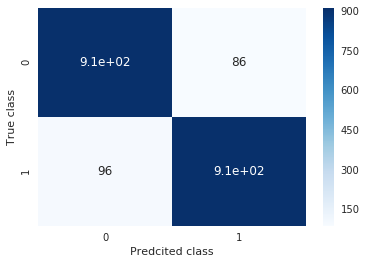

In [284]:
cm = confusion_matrix(y_test, y_test_pred)

ax= sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)

ax.set_xlabel('Predcited class')
ax.set_ylabel('True class')

In [285]:
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       994
           1       0.91      0.90      0.91      1006

   micro avg       0.91      0.91      0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

0.909


Stability selection

In [286]:
from sklearn.linear_model import RandomizedLogisticRegression
sel = RandomizedLogisticRegression(n_resampling=200, random_state= 1)
sel.fit(X_train, y_train)
sel.scores_

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Memory is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Parallel is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(m

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, whic

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, whic

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, whic

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, whic

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, whic

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, whic

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, whic

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, whic

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.21 , 0.81 , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.16 , 1.   , 0.   ,
       0.   , 0.67 , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.095, 0.   , 0.   ,
       0.   ])

In [287]:
np.sum(sel.get_support())

4

In [289]:
X_train_s = sel.transform(X_train)
X_test_s = sel.transform(X_test)

In [290]:
clf2= LogisticRegression( penalty='l1', random_state= 1)
clf2.fit(X_train_s,y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [291]:
clf2.score(X_test_s, y_test)

0.9165

In [292]:
y_test_pred2 = clf.predict(X_test)

Text(33.0, 0.5, 'True class')

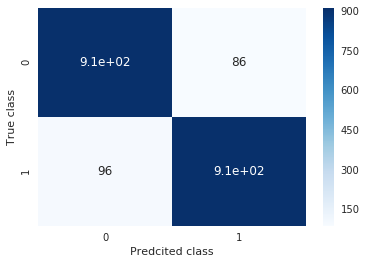

In [293]:
cm = confusion_matrix(y_test, y_test_pred2)

ax= sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)

ax.set_xlabel('Predcited class')
ax.set_ylabel('True class')

In [294]:
print(classification_report(y_test, y_test_pred2))
print(accuracy_score(y_test, y_test_pred2))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       994
           1       0.91      0.90      0.91      1006

   micro avg       0.91      0.91      0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

0.909


In [295]:
train_set_df, val_set_df = train_test_split(final, test_size = .2, random_state= 1)

In [296]:
train_set_df.shape, val_set_df.shape

((140368, 8), (35093, 8))

In [297]:
list(final.columns.values) 

['bResult',
 'Minute',
 'Blue_Kill_count',
 'Blue_Object_count',
 'Blue_Monster_count',
 'Red_Kill_count',
 'Red_Object_count',
 'Red_Monster_count']

In [298]:
col = [
 'Minute',
 'Blue_Kill_count',
 'Blue_Object_count',
 'Blue_Monster_count',
 'Red_Kill_count',
 'Red_Object_count',
 'Red_Monster_count',
 'bResult']

In [299]:
train_set_df.to_csv('ctrain.csv', index=False, columns=col)

In [300]:
val_set_df.to_csv('cval.csv', index=False, columns=col)

In [301]:
train_df = pd.read_csv('ctrain.csv')
train_df.head()

,Minute,Blue_Kill_count,Blue_Object_count,Blue_Monster_count,Red_Kill_count,Red_Object_count,Red_Monster_count,bResult
0,34,5.0,1.0,0.0,6.0,9.0,6.0,0
1,5,1.0,0.0,0.0,1.0,0.0,0.0,0
2,33,8.0,9.0,0.0,2.0,2.0,4.0,1
3,26,5.0,1.0,0.0,4.0,3.0,3.0,0
4,28,7.0,3.0,0.0,5.0,5.0,4.0,0


In [302]:
train_df.isnull().any()

Minute                False
Blue_Kill_count       False
Blue_Object_count     False
Blue_Monster_count    False
Red_Kill_count        False
Red_Object_count      False
Red_Monster_count     False
bResult               False
dtype: bool

In [303]:
test_df = pd.read_csv('cval.csv')

In [304]:
test_df.dtypes

Minute                  int64
Blue_Kill_count       float64
Blue_Object_count     float64
Blue_Monster_count    float64
Red_Kill_count        float64
Red_Object_count      float64
Red_Monster_count     float64
bResult                 int64
dtype: object

In [305]:
final.corr()

,bResult,Minute,Blue_Kill_count,Blue_Object_count,Blue_Monster_count,Red_Kill_count,Red_Object_count,Red_Monster_count
bResult,1.000000,-0.012238,0.213454,0.346343,NaN,-0.244942,-0.380366,-0.021179
Minute,-0.012238,1.000000,0.653757,0.676048,NaN,0.657093,0.658580,0.906867
Blue_Kill_count,0.213454,0.653757,1.000000,0.674104,NaN,0.548268,0.295269,0.591511
Blue_Object_count,0.346343,0.676048,0.674104,1.000000,NaN,0.308243,0.189987,0.653429
Blue_Monster_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Red_Kill_count,-0.244942,0.657093,0.548268,0.308243,NaN,1.000000,0.668712,0.596578
Red_Object_count,-0.380366,0.658580,0.295269,0.189987,NaN,0.668712,1.000000,0.655603
Red_Monster_count,-0.021179,0.906867,0.591511,0.653429,NaN,0.596578,0.655603,1.000000


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(left, right)


<function matplotlib.pyplot.show(*args, **kw)>

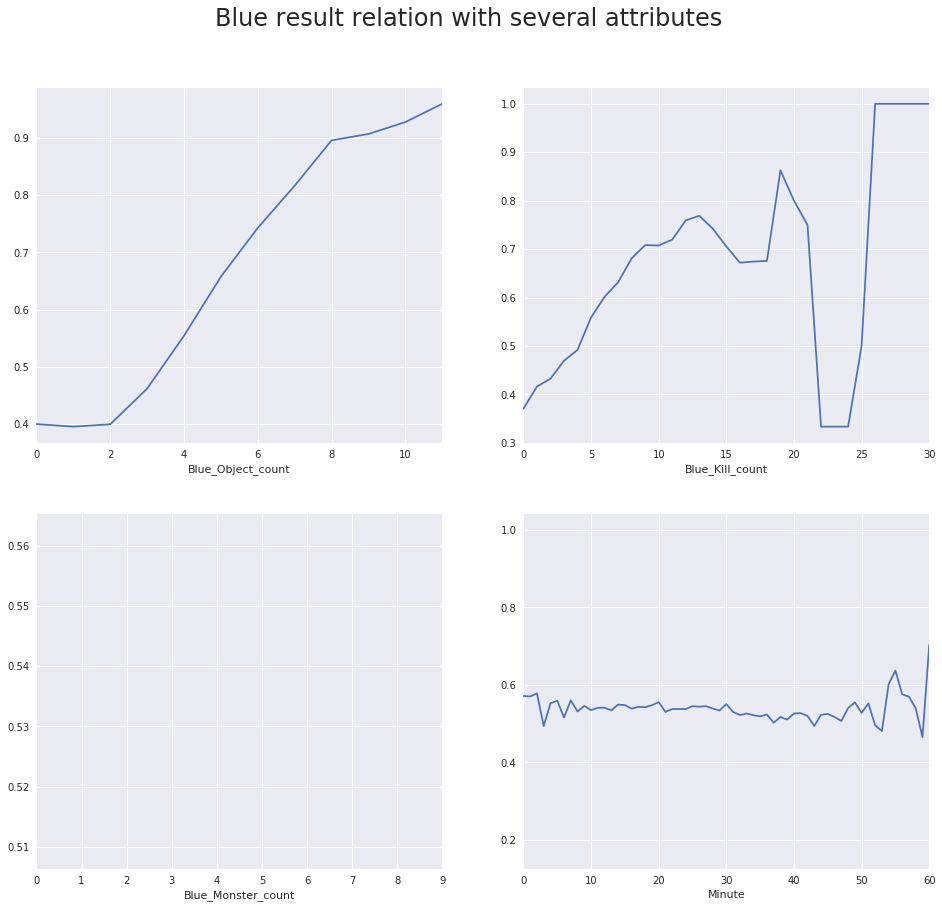

In [306]:
fig, ax = plt.subplots(2,2, figsize=(16,14))
fig.suptitle('Blue result relation with several attributes', fontsize=24)
fig.subplots_adjust(top=0.9)
p1 = plt.subplot2grid((2,2), (0,0), colspan=1)
train_df.groupby(['Blue_Object_count'])['bResult'].mean().plot()
p2 = plt.subplot2grid((2,2), (0,1), colspan=1)
train_df.groupby(['Blue_Kill_count'])['bResult'].mean().plot()
p3 = plt.subplot2grid((2,2), (1,0), colspan=1)
train_df.groupby(['Blue_Monster_count'])['bResult'].mean().plot()
p3.set_xlim(0,9)
p4 = plt.subplot2grid((2,2), (1,1), colspan=1)
train_df.groupby(['Minute'])['bResult'].mean().plot()
p4.set_xlim(0,60)
plt.show

By the parameer again blue result graph, it proved our hypothesis that number of objects taken reflect win rate the most and number of kills the least. Funny fact is that as the number become big on kill_count, monster_count and Object_count, their winrate slightly reduced so we suppose that professional player throws their lead when they have advantage too.